This notebook generates the figures for Chapter 3: Preprocessing from Poldrack, Mumford, and Nichols' _Handbook of fMRI Data Analysis (2nd Edition)_

In [1]:
import os,sys,shutil
from wand.image import Image as WImage
import numpy
import scipy.stats
import matplotlib.pyplot as plt
import nilearn.plotting
%matplotlib inline
import nibabel
from nipype.interfaces import fsl

from nipype.caching import Memory
# use nipype's caching mechanism to save the results of the processing
mem = Memory(base_dir='.')


from fmrihandbook.utils.config import Config

config=Config()

# set up rpy2 so we can use R magic
%load_ext rpy2.ipython



('using base dir:', '/home/vagrant/data')


__Figure 3.1__: Use original manually generated version

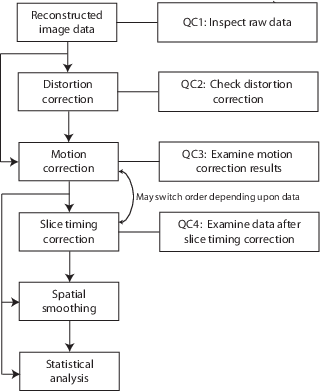

In [2]:
WImage(filename=os.path.join(config.orig_figuredir,'Figure_3_1.pdf'))

__Figure 3.2__: Use original manually generated version

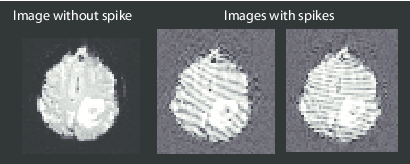

In [3]:
WImage(filename=os.path.join(config.orig_figuredir,'Figure_3_2.pdf'))

__Figure 3.3__: Use original manually generated version

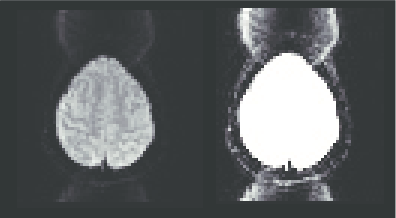

In [4]:
WImage(filename=os.path.join(config.orig_figuredir,'Figure_3_3.pdf'))

__Figure 3.4__: Example of ICA component map and timecourse

(575, 750, 3)
(3289, 850, 3)


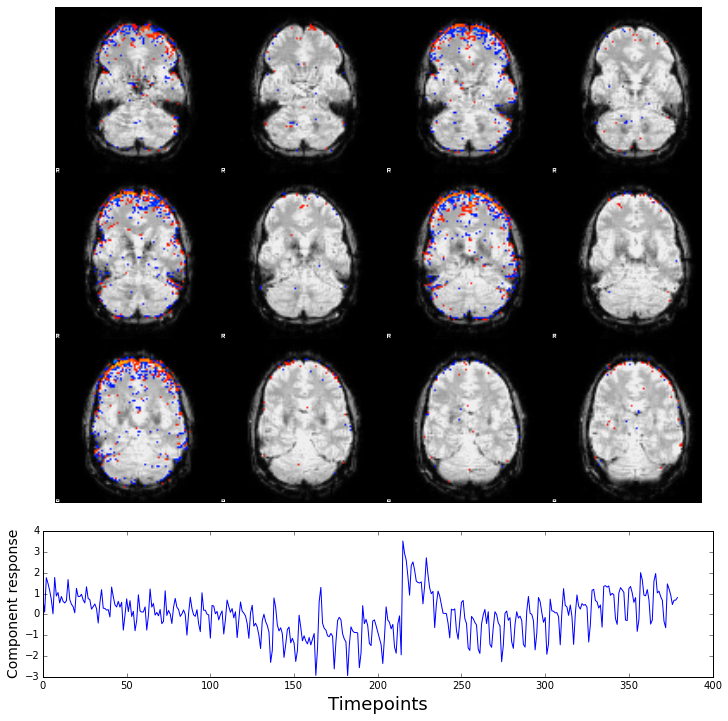

In [5]:
# use image from melodic since it looks better than the nilearn stats maps
import matplotlib
melodic_mix=numpy.loadtxt(os.path.join(config.data['func_ica'],'melodic_mix'))
fig=plt.figure(figsize=(12,12))
ax1 = plt.subplot2grid((4,1), (0,0),rowspan=3)
component_img=matplotlib.image.imread(os.path.join(config.data['func_ica'],'report/IC_11_thresh.png'))
cropped_img=numpy.squeeze(component_img[1175:1750,:750,:])
print cropped_img.shape
print component_img.shape
plt.imshow(cropped_img)
plt.xticks([])
plt.yticks([])

ax1 = plt.subplot2grid((4,1), (3,0))
plt.plot(melodic_mix[:,10])
plt.xlabel('Timepoints',fontsize=18)
plt.ylabel('Component response',fontsize=14)
plt.savefig(os.path.join(config.figuredir,'Figure_3_4.svg'),format='svg',dpi=1200)

__Figure 3.5__: Use original manually generated version

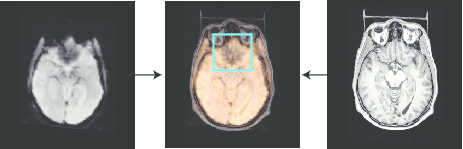

In [6]:
WImage(filename=os.path.join(config.orig_figuredir,'Figure_3_5.pdf'))

__Figure 3.6__: Use original manually generated version - the code below shows how to make a similar image for our dataset but the distortion is much less here so we will use the original example in the book. Also, our data don't come with a wrapped phase image, just a phase difference.

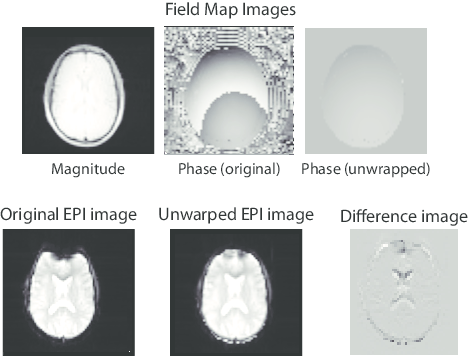

In [7]:
WImage(filename=os.path.join(config.orig_figuredir,'Figure_3_6.pdf'))

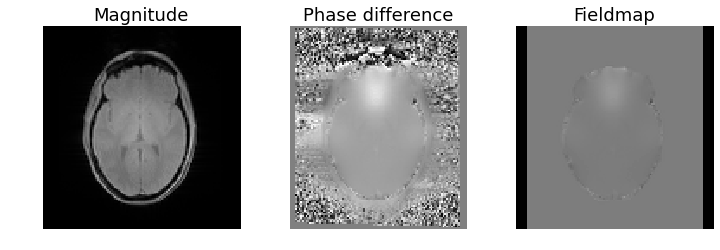

In [8]:
fig=plt.figure(figsize=(12,8))

cutcoord=[30]
mag_img=nibabel.load(config.data['fieldmap-mag'])
phasediff=nibabel.load(config.data['fieldmap-phasediff'])
fmap=nibabel.load(config.data['fieldmap'])

ax1 = plt.subplot2grid((2,3), (0,0))
nilearn.plotting.plot_anat(mag_img,
                           display_mode='z',cut_coords=[30],axes=ax1,
                          annotate=False)
plt.title('Magnitude',fontsize=18)
ax2 = plt.subplot2grid((2,3), (0,1))
nilearn.plotting.plot_anat(phasediff,display_mode='z',
                           cut_coords=[30],axes=ax2,
                          annotate=False)
plt.title('Phase difference',fontsize=18)
ax3 = plt.subplot2grid((2,3), (0,2))
nilearn.plotting.plot_anat(nilearn.image.index_img(fmap,0),display_mode='z',
                           cut_coords=[30],axes=ax3,
                          annotate=False)
plt.title('Fieldmap',fontsize=18)


__Figure 3.7__: Use original manually generated version

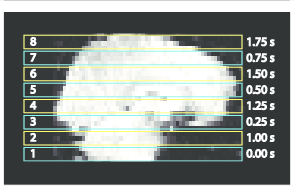

In [9]:
WImage(filename=os.path.join(config.orig_figuredir,'Figure_3_7.pdf'))

__Figure 3.8__: Example of effects of slice timing on HRF

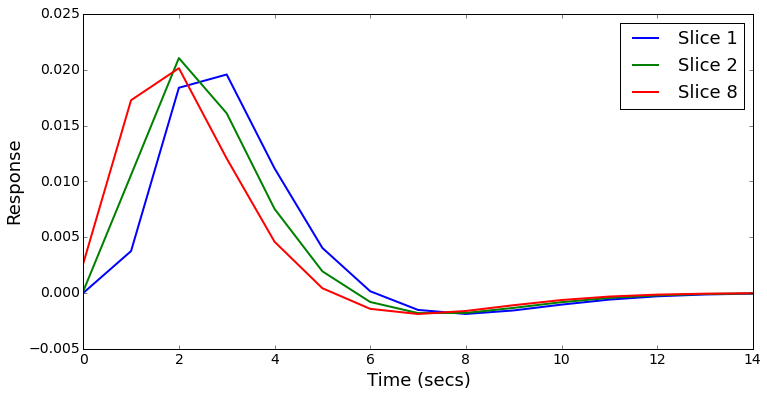

In [10]:
from nipy.modalities.fmri.hemodynamic_models import spm_hrf
tr=0.1
hrf=spm_hrf(tr,oversampling=1)

plt.figure(figsize=(12,6))
plt.plot(hrf[range(0,300,20)],linewidth=2)
plt.plot(hrf[range(9,300,20)],linewidth=2)
plt.plot(hrf[range(18,300,20)],linewidth=2)
plt.legend(['Slice 1','Slice 2 ','Slice 8'],fontsize=18)
plt.xlabel('Time (secs)',fontsize=18)
plt.ylabel('Response',fontsize=18)
ax=plt.gca()
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig(os.path.join(config.figuredir,'Figure_3_8.svg'),format='svg',dpi=1200)

__Figure 3.9__: Depiction of slice timing correction

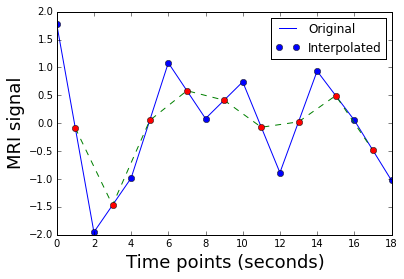

In [11]:
numpy.random.seed(7002)

from statsmodels.tsa.arima_process import arma_generate_sample
# generate AR1 data
t1=arma_generate_sample([1.,0.41],[1,0.0],10)

plt.plot(range(0,20,2),t1)
plt.plot(range(0,20,2),t1,'bo')

interp_data=(t1[1:] + t1[:-1])/2.
plt.plot(range(1,19,2),interp_data,'--')
plt.plot(range(1,19,2),interp_data,'ro')
plt.ylabel('MRI signal',fontsize=18)
plt.xlabel('Time points (seconds)',fontsize=18)
plt.legend(['Original','Interpolated'])
plt.savefig(os.path.join(config.figuredir,'Figure_3_9.svg'),format='svg',dpi=1200)

__Figure 3.10__: Use original manually generated version

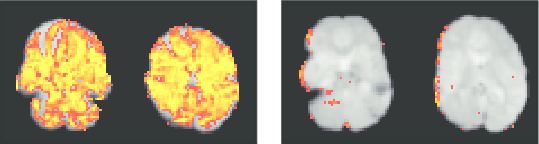

In [12]:
WImage(filename=os.path.join(config.orig_figuredir,'Figure_3_10.pdf'))

__Figure 3.11__: Use original manually generated version

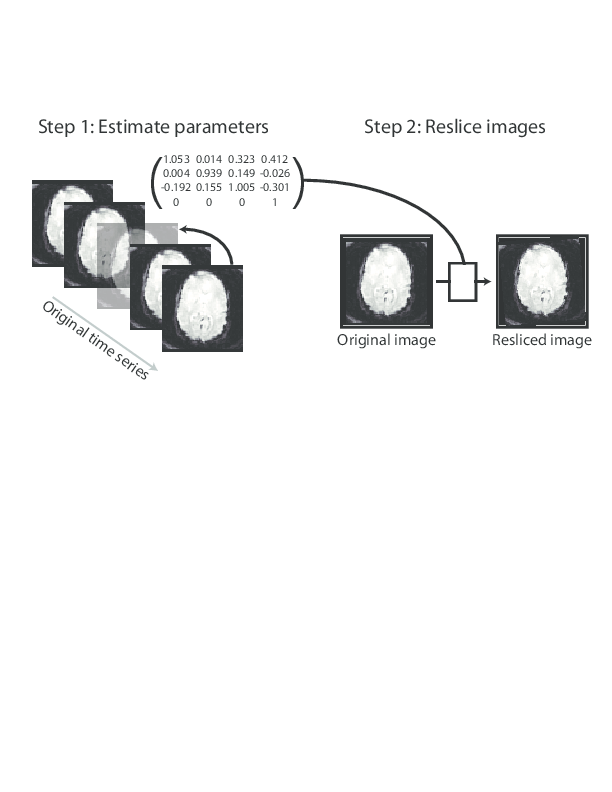

In [13]:
WImage(filename=os.path.join(config.orig_figuredir,'Figure_3_11.pdf'))

__Figure 3.12__: Effects of motion correction. 

INFO:workflow:Executing node 33dccae2546749dd4e6966be1d57e98e in dir: /home/vagrant/fmri-handbook-2e-code/notebooks/Chapter3-Preprocessing/nipype_mem/nipype-interfaces-fsl-preprocess-MCFLIRT/33dccae2546749dd4e6966be1d57e98e
INFO:workflow:Collecting precomputed outputs



mat_file = <undefined>
mean_img = /home/vagrant/fmri-handbook-2e-code/notebooks/Chapter3-Preprocessing/nipype_mem/nipype-interfaces-fsl-preprocess-MCFLIRT/33dccae2546749dd4e6966be1d57e98e/sub-01_ses-014_task-nback_run-001_bold_mcf_mcf.nii.gz_mean_reg.nii.gz
out_file = /home/vagrant/fmri-handbook-2e-code/notebooks/Chapter3-Preprocessing/nipype_mem/nipype-interfaces-fsl-preprocess-MCFLIRT/33dccae2546749dd4e6966be1d57e98e/sub-01_ses-014_task-nback_run-001_bold_mcf_mcf.nii.gz
par_file = /home/vagrant/fmri-handbook-2e-code/notebooks/Chapter3-Preprocessing/nipype_mem/nipype-interfaces-fsl-preprocess-MCFLIRT/33dccae2546749dd4e6966be1d57e98e/sub-01_ses-014_task-nback_run-001_bold_mcf_mcf.nii.gz.par
rms_files = <undefined>
std_img = <undefined>
variance_img = <undefined>



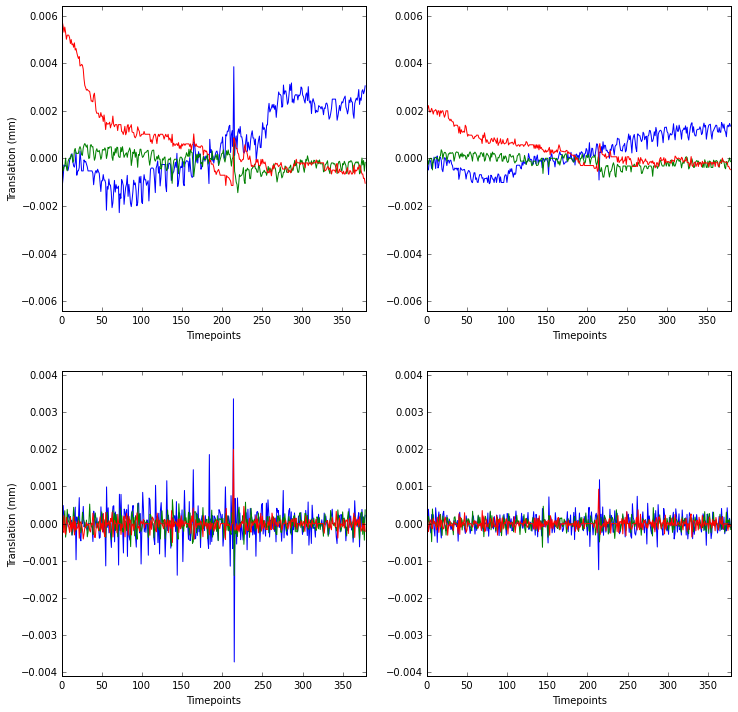

In [14]:
# First need to rerun motion correction on the already-corrected data 
mcflirt_rerun = mem.cache(fsl.MCFLIRT)
mcflirt_results = mcflirt_rerun(in_file=config.data['func_mcf'],
                          save_plots=True,
                          mean_vol=True)
print mcflirt_results.outputs
motion_params_orig=numpy.loadtxt(config.data['motionpar'])
motion_params_rerun=numpy.loadtxt(mcflirt_results.outputs.par_file)
disp_orig=motion_params_orig[1:,:3]-motion_params_orig[:-1,:3]
disp_rerun=motion_params_rerun[1:,:3]-motion_params_rerun[:-1,:3]

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.plot(motion_params_orig[:,:3])
maxabsmot=numpy.max(numpy.abs(motion_params_orig[:,:3]))
plt.axis([0,motion_params_orig.shape[0],-1.1*maxabsmot,1.1*maxabsmot])
plt.xlabel('Timepoints')
plt.ylabel('Translation (mm)')

plt.subplot(2,2,2)
plt.plot(motion_params_rerun[:,:3])
plt.axis([0,motion_params_rerun.shape[0],-1.1*maxabsmot,1.1*maxabsmot])
plt.xlabel('Timepoints')

plt.subplot(2,2,3)
maxabsdisp=numpy.max(numpy.abs(disp_orig[:,:3]))
plt.plot(disp_orig[:,:3])
plt.axis([0,disp_orig.shape[0],-1.1*maxabsdisp,1.1*maxabsdisp])
plt.xlabel('Timepoints')
plt.ylabel('Translation (mm)')

plt.subplot(2,2,4)
plt.plot(disp_rerun[:,:3])
plt.axis([0,disp_rerun.shape[0],-1.1*maxabsdisp,1.1*maxabsdisp])
plt.xlabel('Timepoints')

               

INFO:workflow:Executing node a75ccc6451a4fa9a4793307f8487f607 in dir: /home/vagrant/fmri-handbook-2e-code/notebooks/Chapter3-Preprocessing/nipype_mem/nipype-interfaces-fsl-utils-MotionOutliers/a75ccc6451a4fa9a4793307f8487f607
INFO:workflow:Running: fsl_motion_outliers -i /home/vagrant/data/ds031/sub-01/ses-014/func/sub-01_ses-014_task-nback_run-001_bold.nii.gz --fd -o sub-01_ses-014_task-nback_run-001_bold_outliers.txt -p sub-01_ses-014_task-nback_run-001_bold_metrics.png -s sub-01_ses-014_task-nback_run-001_bold_metrics.txt



out_file = /home/vagrant/fmri-handbook-2e-code/notebooks/Chapter3-Preprocessing/nipype_mem/nipype-interfaces-fsl-utils-MotionOutliers/a75ccc6451a4fa9a4793307f8487f607/sub-01_ses-014_task-nback_run-001_bold_outliers.txt
out_metric_plot = /home/vagrant/fmri-handbook-2e-code/notebooks/Chapter3-Preprocessing/nipype_mem/nipype-interfaces-fsl-utils-MotionOutliers/a75ccc6451a4fa9a4793307f8487f607/sub-01_ses-014_task-nback_run-001_bold_metrics.png
out_metric_values = /home/vagrant/fmri-handbook-2e-code/notebooks/Chapter3-Preprocessing/nipype_mem/nipype-interfaces-fsl-utils-MotionOutliers/a75ccc6451a4fa9a4793307f8487f607/sub-01_ses-014_task-nback_run-001_bold_metrics.txt



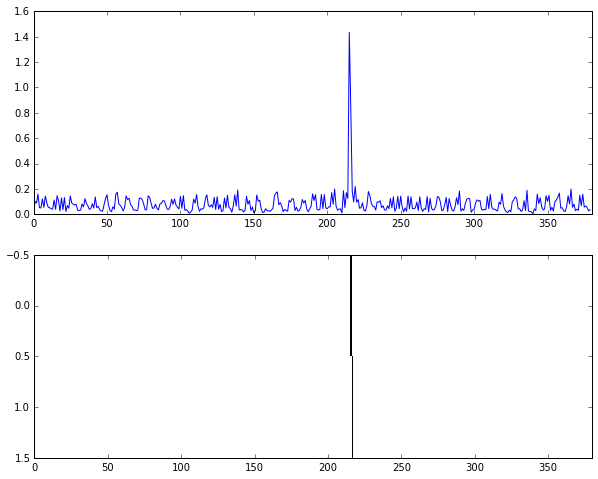

In [15]:
mo = mem.cache(fsl.MotionOutliers)
mo_results=mo(in_file = config.data['func'],
                metric='fd')
print mo_results.outputs
fig=plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
metvalues=numpy.loadtxt(mo_results.outputs.out_metric_values)
plt.plot(metvalues)
plt.xlim(0,len(metvalues))
plt.subplot(2,1,2)
plt.imshow(numpy.loadtxt(mo_results.outputs.out_file ).T*-1 +1,aspect='auto',
           cmap='gray',interpolation='nearest')


__Figure 3.13__: Aliasing example

(19999,)
(19999,)


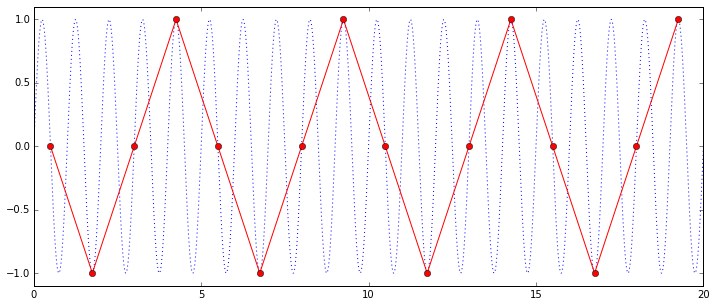

In [16]:
samp_rate=1000
signal_freq=1.25 # hz
ncycles=20
x=numpy.arange(0,ncycles*2.*numpy.pi,numpy.pi/(samp_rate/2.))
x=x[:samp_rate*ncycles]
sin_x=numpy.sin(x)

x_time=numpy.arange(1/float(samp_rate),ncycles,1/float(samp_rate))
sin_x=sin_x[:len(x_time)]


resample_2hz=numpy.arange(500,len(sin_x),signal_freq*samp_rate).astype('int')

sin_x_resample_2hz=sin_x[resample_2hz]
plt.figure(figsize=(12,5))
plt.plot(x_time,sin_x,'b:')
plt.plot(x_time[resample_2hz],sin_x_resample_2hz,'ro-')
plt.axis([0,numpy.max(x_time),-1.1,1.1])
print sin_x.shape
print x_time.shape
plt.savefig(os.path.join(config.figuredir,'Figure_3_13.svg'),format='svg',dpi=1200)

__Figure 3.14__: Effects of smoothing on activation.

In [17]:
smooth=mem.cache(fsl.SpatialFilter)
glm=mem.cache(fsl.GLM)
config.data['groupfunc']=os.path.join(config.datadir,'ds009/task002_cope001_go.nii.gz')
output_dir=os.path.dirname(config.data['groupfunc'])
assert config.data['groupfunc'].find('.nii')>-1

for smoothing in [0,4,8,16,32]:
    if smoothing>0:
        outfile=os.path.join(output_dir,config.data['groupfunc'].replace('.nii','_smooth%d.nii'%smoothing))
        # http://brainder.org/2011/08/20/gaussian-kernels-convert-fwhm-to-sigma/
        kernelsize=smoothing/2.35482004503 
        if not os.path.exists(outfile):                 
            smooth(in_file=config.data['groupfunc'],
                            operation='mean',
                            kernel_shape='gauss',
                            kernel_size=kernelsize,
                            out_file=outfile)
    else:
        outfile=config.data['groupfunc']
    
    desfile_1stt=os.path.join(output_dir,'1samplettest.txt')
    datafile=nibabel.load(config.data['groupfunc'])
    
    if not os.path.exists(desfile_1stt):
        numpy.savetxt(desfile_1stt,numpy.ones((datafile.shape[3],1)))

    if smoothing>0:
        out_t=outfile.replace('.nii','_tstat.nii')
    else:
        out_t=outfile.replace('.nii','_smooth0_tstat.nii')
    
    if not os.path.exists(out_t):
        glm_result=glm(in_file=outfile, design=desfile_1stt, 
                       out_t_name=out_t,
                       mask=os.path.join(config.fsldir,'data/standard/MNI152_T1_2mm_brain_mask.nii.gz'))
    
        

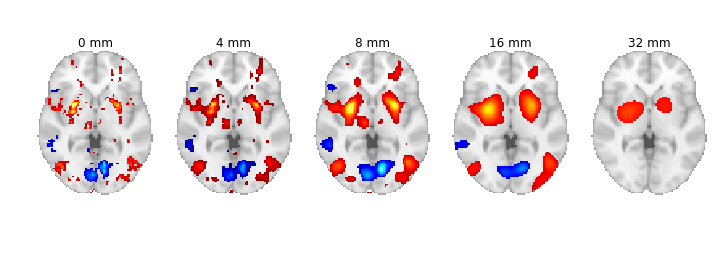

In [18]:
ax={}
fig=plt.figure(figsize=(12,4))
ctr=0
for smoothing in [0,4,8,16,32]:
    ax[smoothing] = plt.subplot2grid((1,5), (0,ctr))
    ctr+=1
    infile=os.path.join(output_dir,config.data['groupfunc'].replace('.nii','_smooth%d_tstat.nii'%smoothing))
    nilearn.plotting.plot_stat_map(nibabel.load(infile),threshold=3,
                                  display_mode='z',
                                  cut_coords=[0],
                                  colorbar=False,annotate=False,axes=ax[smoothing])
    plt.title('%d mm'%smoothing)

plt.savefig(os.path.join(config.figuredir,'Figure_3_14.svg'),format='svg',dpi=1200)